In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
from sklearn.datasets import load_iris
iris=load_iris()
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df['target']=iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [21]:
df.target.unique() #0= setosa , 1= versicolor, 2= virginica

array([0, 1, 2])

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


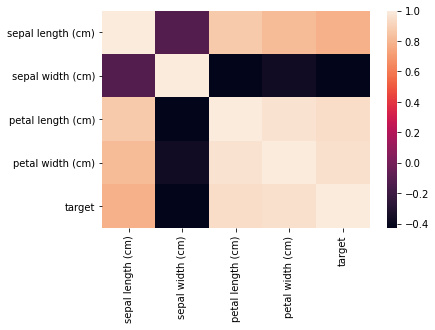

In [23]:
corr=df.corr()
sns.heatmap(corr)
corr

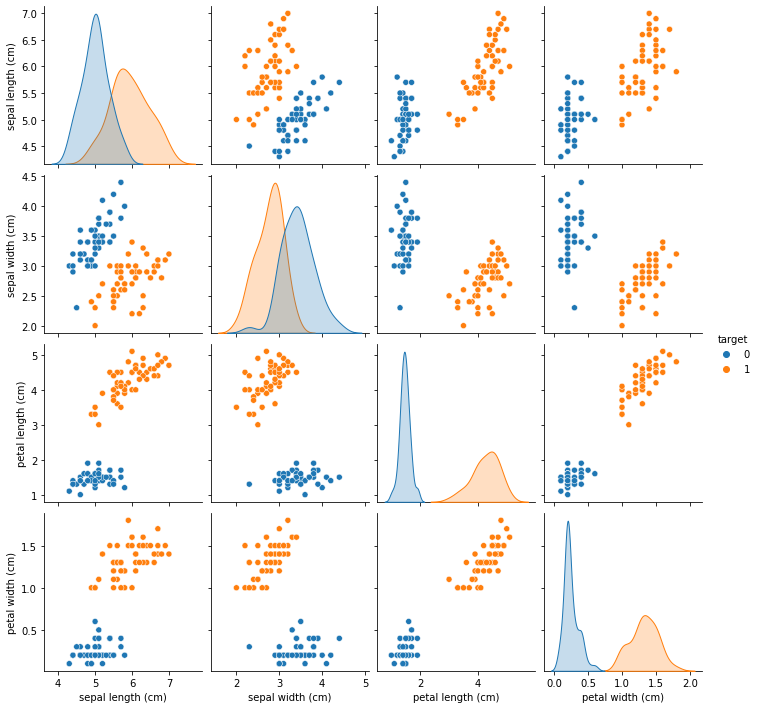

In [40]:
sns.pairplot(data=df, hue="target")

In [29]:
df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [32]:
df=df[df.target!=2] #means we are taking 0 and 1 i.e setosa and versicolor

In [33]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [34]:
df.target.unique()

array([0, 1])

In [39]:
#split the dataset 

X=df.iloc[:,:-1] #except target variable means independent features
y=df.iloc[:,-1] #only target variable means dependent fetaures

In [52]:
#train test split

from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)


In [1]:
from sklearn.linear_model import LogisticRegression
lg= LogisticRegression()

In [54]:
#from sklearn.model_selection import GridSearchCV

lg.fit(X_train,y_train)

LogisticRegression()

In [55]:
y_pred=lg.predict(X_test) 

In [56]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test) #y_pred contains predicted target value and y_test conatins target actual values

1.0

In [59]:
#cross validation

from sklearn.model_selection import cross_val_score

cross_val_score(lg,X,y,cv=5) #we split the data into five groups

array([1., 1., 1., 1., 1.])

In [65]:
#leave one leave out 

from sklearn.model_selection import LeaveOneOut

scores=cross_val_score(lg,X,y,cv=LeaveOneOut())

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [66]:
scores.mean()

1.0